#  Task 1 Introduction : Transportation in Ireland
ROA23 - Users of Cars Involved in Fatal and Injury Collisions https://data.gov.ie/dataset/roa23-users-of-cars-involved-in-fatal-and-injury-collisions

About this file Dataset contains these rows:

Licensed under: Creative Commons Attribution 4.0 GITHUB LINK: https://github.com/Johanna23cct/-Users-of-Cars-Involved-in-Fatal-and-Injury-Collisions.git

#  Task 2 Setup and imports libraries

In [1]:
# Importing some libraries:
import pandas as pd
import statistics as stats
import numpy as np
import csv
# import some libraries for Visualising the price variable:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor

#  Task 3 importing data and EDA
Read data from csv. Shape. Drop unnecessary columns. add sentiment.

Calculation of Polarity summary statistics Descriptive

In [2]:
df = pd.read_csv('collisions.csv')
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03121V03773,Seat Belt Usage,UNIT,VALUE
0,ROA23C1,Users of Cars Killed in Collisions,2005,2005,1,Car drivers: seat belt in use,Number,55.0
1,ROA23C1,Users of Cars Killed in Collisions,2005,2005,2,Car drivers: seat belt not in use,Number,38.0
2,ROA23C1,Users of Cars Killed in Collisions,2005,2005,3,Car drivers: seat belt usage unknown,Number,37.0
3,ROA23C1,Users of Cars Killed in Collisions,2005,2005,4,Car drivers: seat belt usage not stated,Number,14.0
4,ROA23C1,Users of Cars Killed in Collisions,2005,2005,9,All car drivers,Number,144.0


In [3]:
df.shape

(680, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        680 non-null    object 
 1   Statistic Label  680 non-null    object 
 2   TLIST(A1)        680 non-null    int64  
 3   Year             680 non-null    int64  
 4   C03121V03773     680 non-null    int64  
 5   Seat Belt Usage  680 non-null    object 
 6   UNIT             680 non-null    object 
 7   VALUE            595 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 42.6+ KB


In [5]:
df.isnull()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03121V03773,Seat Belt Usage,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
675,False,False,False,False,False,False,False,False
676,False,False,False,False,False,False,False,False
677,False,False,False,False,False,False,False,False
678,False,False,False,False,False,False,False,False


In [6]:
# To Drop one duplicate row TLIST(A1)	Year
to_drop = ['TLIST(A1)', 'C03121V03773' ]
df.drop(columns=to_drop, inplace=True)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt Usage,UNIT,VALUE
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0


In [7]:
df.rename(columns={'Seat Belt Usage': 'Seat Belt'}, inplace=True)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0


In [8]:
df.tail()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE
675,ROA23C4,All Users of Cars Involved in Fatal and Injury...,2021,Front seat passengers: seat belt in use,Number,785.0
676,ROA23C4,All Users of Cars Involved in Fatal and Injury...,2021,Front seat passengers: seat belt not in use,Number,57.0
677,ROA23C4,All Users of Cars Involved in Fatal and Injury...,2021,Front seat passengers: seat belt usage unknown,Number,242.0
678,ROA23C4,All Users of Cars Involved in Fatal and Injury...,2021,Front seat passengers: seat belt usage not stated,Number,2.0
679,ROA23C4,All Users of Cars Involved in Fatal and Injury...,2021,All front seat passengers,Number,1086.0


In [9]:
print(df['Seat Belt'])

0                          Car drivers: seat belt in use
1                      Car drivers: seat belt not in use
2                   Car drivers: seat belt usage unknown
3                Car drivers: seat belt usage not stated
4                                        All car drivers
                             ...                        
675              Front seat passengers: seat belt in use
676          Front seat passengers: seat belt not in use
677       Front seat passengers: seat belt usage unknown
678    Front seat passengers: seat belt usage not stated
679                            All front seat passengers
Name: Seat Belt, Length: 680, dtype: object


In [10]:
# Define a function to assign sentiment based on commentary
def assign_sentiment(commentary):
    sentiments = []
    if "seat belt in use" in commentary:
        sentiments.append(1)
    if "seat belt not in use" in commentary:
        sentiments.append(-1)
    if "seat belt usage unknown" in commentary:
        sentiments.append(0)
    if "seat belt usage not stated" in commentary:
        sentiments.append(-1)
    if "All front seat passengers" in commentary:
        sentiments.append(1)
    if "All car drivers" in commentary:
        sentiments.append(1)
    return sentiments

# Create a new column 'Sentiment' based on the commentary
df['Sentiment'] = df['Seat Belt'].apply(assign_sentiment)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,[1]
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,[-1]
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,[0]
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,[-1]
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,[1]


In [11]:
# Initialize an empty set to collect unique sentiment values
unique_sentiments = set()

# Iterate over each list in the 'Sentiment' column and collect unique values
for sentiment_list in df['Sentiment']:
    unique_sentiments.update(sentiment_list)

# Print out the unique sentiment values
print(unique_sentiments)


{0, 1, -1}


In [12]:
df['Polarity_Rating'] = df['Sentiment'].apply(lambda x: 'Positive' if x == 1 else ('Neutral' if x == 0 else 'Negative'))

In [13]:
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment,Polarity_Rating
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,[1],Negative
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,[-1],Negative
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,[0],Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,[-1],Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,[1],Negative


**Plot the Rating visualization graph**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

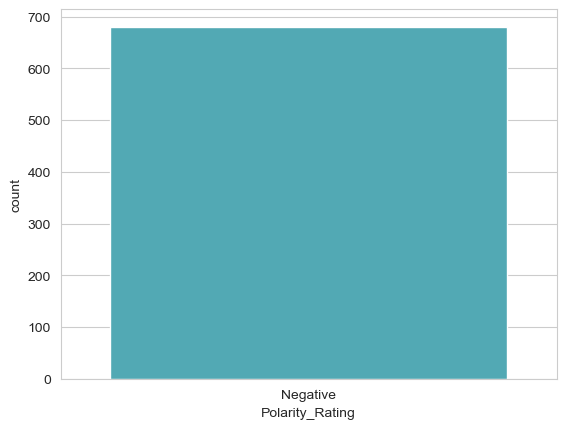

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='YlGnBu_r')

**Plot the Polarity Rating count**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

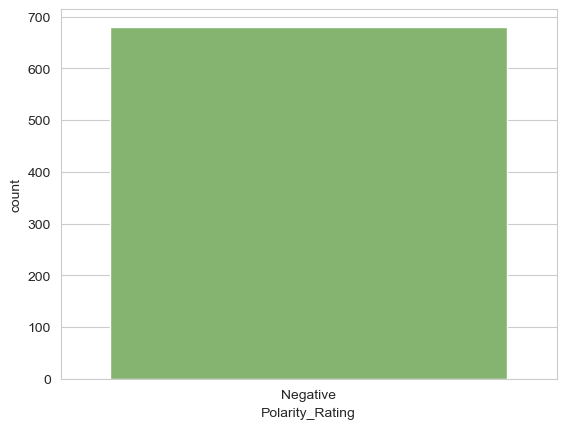

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

**Data Preprocessing**

In [28]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:1]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity dataset and create final dataframe**

In [29]:
df_Neutral_over = df_Neutral.sample(0, replace=True)
df_Negative_over = df_Negative.sample(0, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [30]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Apply the method "get_text_processing" into column review text**

In [31]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

KeyError: 'Review Text'

**Visualize Text Review with Polarity Rating**

In [26]:
df = df[['review', 'Polarity_Rating']]
df.head()

KeyError: "['review'] not in index"

**Apply One hot encoding on negative, neutral, and positive**

In [32]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,Sentiment


**Apply Train Test Split**

In [34]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

KeyError: 'review'

**Apply vectorization**

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Apply frequency, inverse document frequency:**

In [35]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

NameError: name 'TfidfTransformer' is not defined

**Add different layers**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
**Fit the Model**

In [36]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

NameError: name 'model' is not defined

**Evaluation of Model**

In [38]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

NameError: name 'model' is not defined

In [39]:
**Prediction**

SyntaxError: invalid syntax (2495207704.py, line 1)

In [ ]:
preds = model.predict(X_test)
preds

In [37]:
preds.shape

NameError: name 'preds' is not defined

In [12]:
df['Polarity_Rating'] = df['sentiment'].apply(lambda x: 'Positive' if x == 1 else('Neutral' if x == 0  else 'Negative'))

KeyError: 'sentiment'

In [10]:
print(df['Seat Belt'].head())

0              Car drivers: seat belt in use
1          Car drivers: seat belt not in use
2       Car drivers: seat belt usage unknown
3    Car drivers: seat belt usage not stated
4                            All car drivers
Name: Seat Belt, dtype: object


In [11]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis function to each row in the "Seat Belt" column
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
df.head()

,STATISTIC,Statistic Label,Year,Seat Belt,UNIT,VALUE,SeatBelt_Sentiment
0,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt in use,Number,55.0,Positive
1,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt not in use,Number,38.0,Positive
2,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage unknown,Number,37.0,Negative
3,ROA23C1,Users of Cars Killed in Collisions,2005,Car drivers: seat belt usage not stated,Number,14.0,Negative
4,ROA23C1,Users of Cars Killed in Collisions,2005,All car drivers,Number,144.0,Neutral


In [12]:
# Group the DataFrame by sentiment and count the occurrences of each sentiment
sentiment_counts = df['SeatBelt_Sentiment'].value_counts()



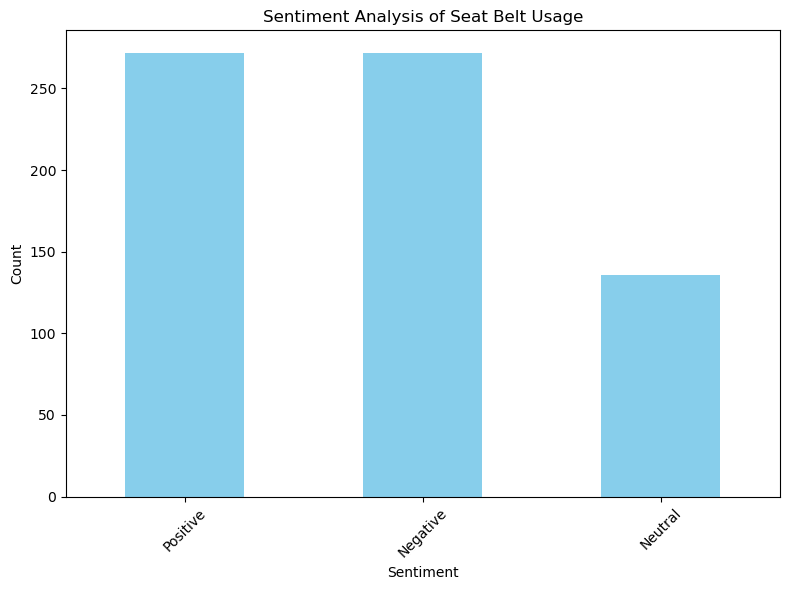

In [13]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis of Seat Belt Usage')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [11]:
df['Sentiment'] = df['SeatBelt_Sentiment']

KeyError: 'SeatBelt_Sentiment'

In [12]:
print(df['SeatBelt_Sentiment'])

KeyError: 'SeatBelt_Sentiment'

In [ ]:
df.dropna()

In [ ]:
def analyze_seat_belt_sentiment(text):
    # Convert the text to lowercase for easier matching
    text = text.lower()
    
    # Assign sentiment based on the content of the text
    if "in use" in text or "All car drivers" in text:
        return "Positive"
    elif "not in use" in text or "unknown" in text or "not stated" in text:
        return "Negative"
    else:
        return "Neutral"
df['SeatBelt_Sentiment'] = df['Seat Belt'].apply(analyze_seat_belt_sentiment)
(df.head())

0                          Car drivers: seat belt in use
1                      Car drivers: seat belt not in use
2                   Car drivers: seat belt usage unknown
3                Car drivers: seat belt usage not stated
4                                        All car drivers
                             ...                        
675              Front seat passengers: seat belt in use
676          Front seat passengers: seat belt not in use
677       Front seat passengers: seat belt usage unknown
678    Front seat passengers: seat belt usage not stated
679                            All front seat passengers
Name: Seat Belt, Length: 680, dtype: object


In [9]:
df.describe()

,Year,VALUE
count,680.000000,595.000000
mean,2013.000000,880.877311
std,4.902586,1424.144822
min,2005.000000,0.000000
25%,2009.000000,18.000000
50%,2013.000000,145.000000
75%,2017.000000,1194.000000
max,2021.000000,7837.000000


In [ ]:
# create a sample DataFrame
df = pd.DataFrame({'categorical_variable': ['Statistic Label', 'Year', 'Seat Belt Usage', 'VALUE']})

In [ ]:
value_counts = df['categorical_variable'].value_counts()

In [ ]:
print(value_counts)

In [8]:
# summary of the dataset: 608 rows, 8 columns, no null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           680 non-null    object 
 1   Statistic Label     680 non-null    object 
 2   Year                680 non-null    int64  
 3   Seat Belt           680 non-null    object 
 4   UNIT                680 non-null    object 
 5   VALUE               595 non-null    float64
 6   SeatBelt_Sentiment  680 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 37.3+ KB
None


In [ ]:
#Prints the minimum value of all the elements in a
a = np.array([df])
print(a.min())
print(a.max())
print(a.sum())

In [ ]:
# Mean
numeric_data = df["Year"]
if numeric_data.dtype == 'int64' or numeric_data.dtype == 'float64':
    mean = numeric_data.mean()
    mean_rounded = round(mean, 2)
    print('Mean:', mean_rounded)
else:
    print("The selected column does not contain numeric data")

In [ ]:
median = home["National"].median()
print('Median:', median)

In [ ]:
def analyze_sentiment(kms_driven, owner_type):
    # Perform sentiment analysis based on your criteria
    # This can be a simple rule-based approach, machine learning model, or any other method
    # For simplicity, let's assume a rule-based approach here
    sentiment_score = 0
    if kms_driven < 50000:
        sentiment_score += 1
    elif 50000 <= kms_driven < 100000:
        sentiment_score += 0.5
    if owner_type == "First":
        sentiment_score += 1
    elif owner_type == "Second":
        sentiment_score += 0.5
    # You can add more conditions or use a more sophisticated approach based on your requirements
    return sentiment_score

In [ ]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)